# Forecasting Tesla Stock Price

#### import packages

In [1]:
from pandas_datareader import data as pdr #read data from yahoo finance api
import yfinance as yf
import matplotlib.pyplot as plt #viz #GUI manager
import seaborn as sns #viz #plotly is another package
import datetime
import pandas as pd
import numpy as np
from pandas import Grouper #groupby
#statistical data exploration, conducting statistical tests, and estimation of different statistical models
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf #autocorrelation plot
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from pandas.plotting import autocorrelation_plot #autocorrelation plot
from statsmodels.graphics.gofplots import qqplot #residual diagnostics
from sklearn.metrics import mean_squared_error #accuracy metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error #accuracy metrics

from random import gauss #create gaussian white noise
from random import seed
from pandas import Series


#### ETS

In [5]:
evsales = pd.read_csv('us_ev_sales_2021.1-2024.6.csv')
evsales

,Timestamp,Daily EV Sales with Noise
0,2021-1-1,836
1,2021-1-2,830
2,2021-1-3,859
3,2021-1-4,849
4,2021-1-5,816
...,...,...
1272,2024-6-26,3981
1273,2024-6-27,4175
1274,2024-6-28,3955
1275,2024-6-29,3961


In [6]:
evsales['Timestamp'] = pd.to_datetime(evsales['Timestamp'])  # Convert the 'Timestamp' column to datetime
evsales.set_index('Timestamp', inplace=True)  # Set 'Timestamp' as the index
evsales.head()


,Daily EV Sales with Noise
Timestamp,
2021-01-01,836
2021-01-02,830
2021-01-03,859
2021-01-04,849
2021-01-05,816


No. of training examples: 1022
No. of testing examples: 255


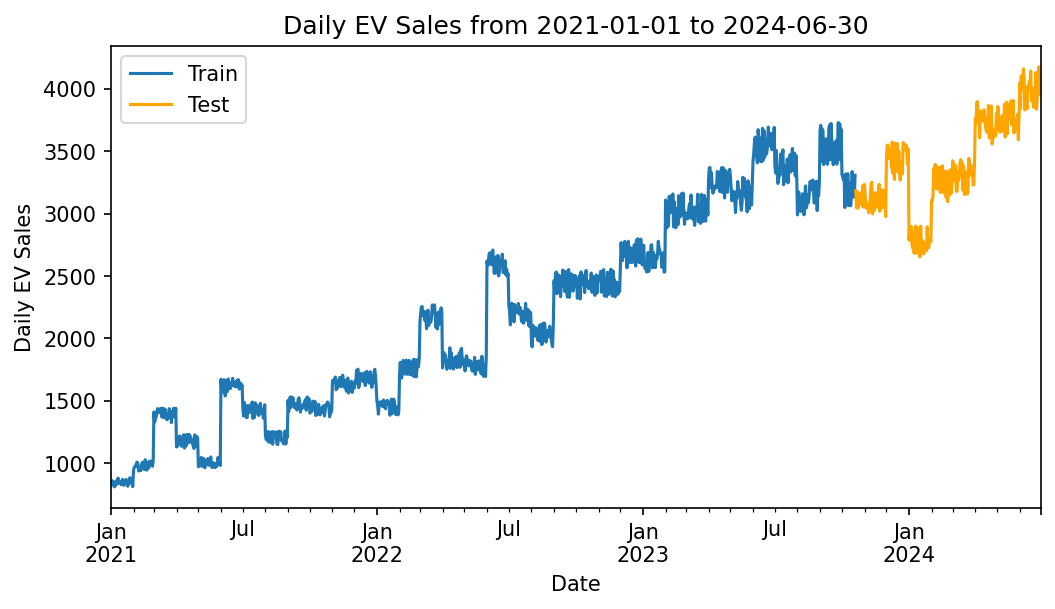

In [9]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create a test set of 20% data points
test_size = 255

# Ensure that the index of 'evsales' DataFrame is datetime formatted
evsales.index = pd.to_datetime(evsales.index, format='%Y-%m')

train_data, test_data = train_test_split(evsales, test_size=test_size, random_state=25, shuffle=False)

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

# Set the plot size
plt.figure(figsize=(8,4), dpi=150)

train_data['Daily EV Sales with Noise'].plot(label='Train')
test_data['Daily EV Sales with Noise'].plot(label='Test', color='orange')

# Set the x-axis limits to ensure the test data appears on the right side
plt.xlim(evsales.index.min(), evsales.index.max())

plt.title('Daily EV Sales from {} to {}'.format(evsales.index.min().strftime('%Y-%m-%d'), evsales.index.max().strftime('%Y-%m-%d')))

plt.xlabel('Date')
plt.ylabel('Daily EV Sales')

plt.legend()
plt.show()


##### Simple

In [24]:
# Import the necessary libraries
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing

# Simple Exponential Smoothing
ins3 = SimpleExpSmoothing(train_data['Daily EV Sales with Noise']).fit()
ins_cast3 = ins3.forecast(len(test_data)).rename('SimpleExpSmoothing')

# Double Exponential Smoothing (Additive and Multiplicative)
double_ets_add = ExponentialSmoothing(train_data['Daily EV Sales with Noise'], trend='add').fit()
double_ets_mul = ExponentialSmoothing(train_data['Daily EV Sales with Noise'], trend='mul').fit()

# Triple Exponential Smoothing (Holt-Winters Additive and Multiplicative)
triple_ets_add = ExponentialSmoothing(train_data['Daily EV Sales with Noise'], trend='add', seasonal='add', seasonal_periods=12).fit()
triple_ets_mul = ExponentialSmoothing(train_data['Daily EV Sales with Noise'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

# Forecast the test period using each of the models
ins_cast3_pred = ins3.forecast(len(test_data))
double_ets_add_pred = double_ets_add.forecast(len(test_data))
double_ets_mul_pred = double_ets_mul.forecast(len(test_data))
triple_ets_add_pred = triple_ets_add.forecast(len(test_data))
triple_ets_mul_pred = triple_ets_mul.forecast(len(test_data))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python

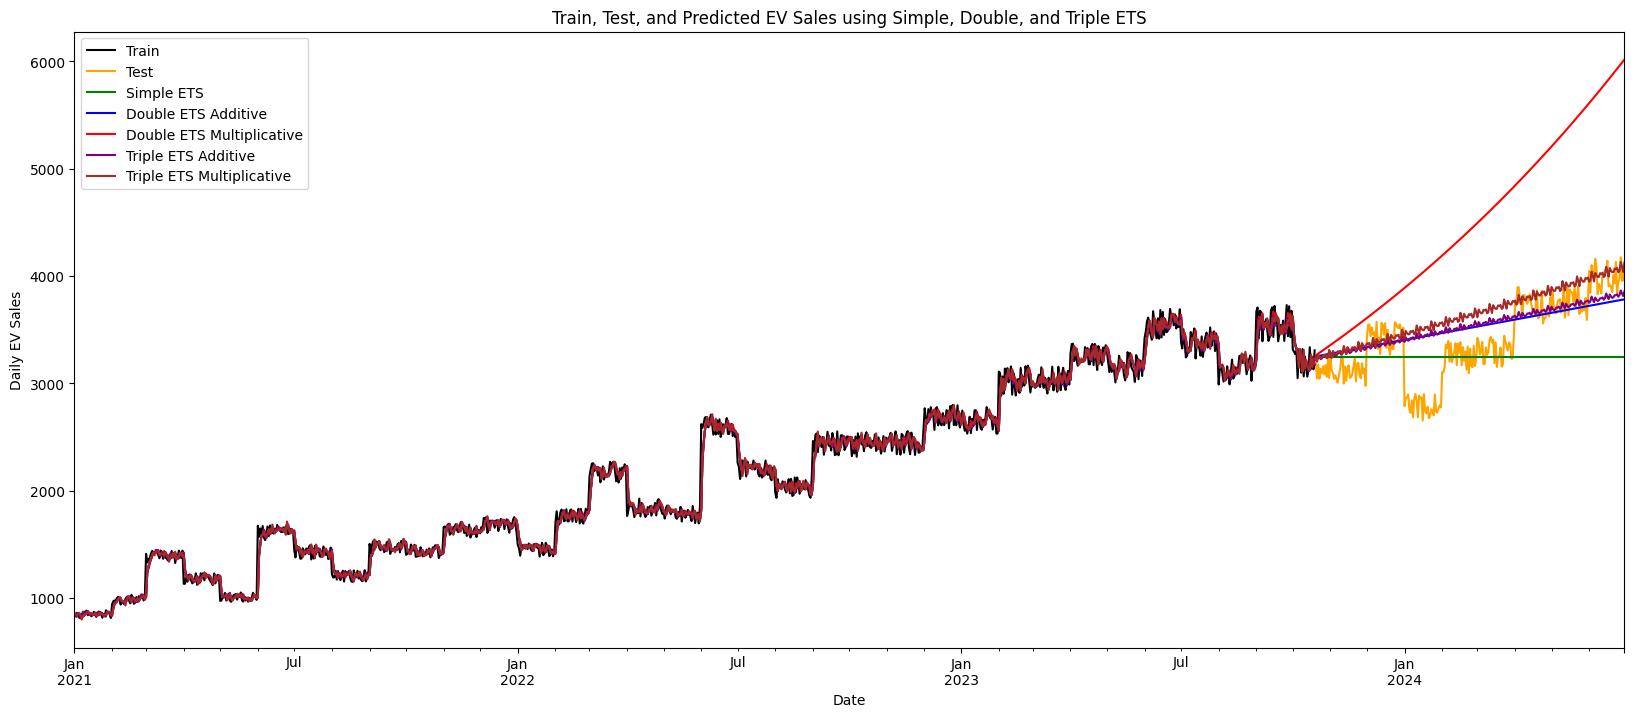

In [26]:
# Plotting the results
plt.figure(figsize=(20, 8))

# Plot the original data (train and test)
train_data['Daily EV Sales with Noise'].plot(label='Train', color='black')
test_data['Daily EV Sales with Noise'].plot(label='Test', color='orange')

# Plot for simple exponential smoothing
ins_cast3.plot(label='Simple ETS', color='green')

# Plot for double ETS additive
double_ets_add_pred.plot(label='Double ETS Additive', color='blue')
double_ets_add.fittedvalues.plot(color='blue')

# Plot for double ETS multiplicative
double_ets_mul_pred.plot(label='Double ETS Multiplicative', color='red')
double_ets_mul.fittedvalues.plot(color='red')

# Plot for triple ETS additive
triple_ets_add_pred.plot(label='Triple ETS Additive', color='purple')
triple_ets_add.fittedvalues.plot(color='purple')

# Plot for triple ETS multiplicative
triple_ets_mul_pred.plot(label='Triple ETS Multiplicative', color='brown')
triple_ets_mul.fittedvalues.plot(color='brown')

# Add labels and title
plt.title('Train, Test, and Predicted EV Sales using Simple, Double, and Triple ETS')
plt.xlabel('Date')
plt.ylabel('Daily EV Sales')
plt.legend()

# Show the plot
plt.show()

#### ARIMA

In [35]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.6 MB/s eta 0:00:00


In [38]:
import pmdarima as pm
import pandas as pd
import matplotlib.pyplot as plt

# Fit the ARIMA model using auto_arima on the training data
arima_model = pm.auto_arima(train_data['Daily EV Sales with Noise'],
                            start_p=1, start_q=1,
                            test='adf',  # Augmented Dickey-Fuller test
                            max_p=3, max_q=3, m=12,  # Seasonal period m=12 (monthly seasonality)
                            start_P=0, seasonal=True,
                            d=None, D=1,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True,
                            trace=True)

# Get the differencing order of the ARIMA model
d = arima_model.order[1]

# Combine train and test data for complete data range
combined_data = pd.concat([train_data['Daily EV Sales with Noise'], test_data['Daily EV Sales with Noise']])

# Predict using the model for the entire data range
arima_fitted_full = arima_model.predict_in_sample(start=d, end=len(combined_data)-1)

# Create a fitted series to match the index of combined data from d
fitted_values_full = pd.Series(arima_fitted_full, index=combined_data.index[d:])

# Forecast the next steps based on the test data range
arima_forecast = arima_model.predict(n_periods=len(test_data))


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=31.44 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=13677.628, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=12611.998, Time=5.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=13084.598, Time=9.26 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=13693.089, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=12845.093, Time=0.17 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=12516.037, Time=17.20 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=22.13 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=8.05 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=13647.649, Time=13.20 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=12407.368, Time=16.54 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=12505.054, Time=6.96 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=29.72 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=12.19 sec
 ARIMA(3,0,0)(2,1,0)[12] int

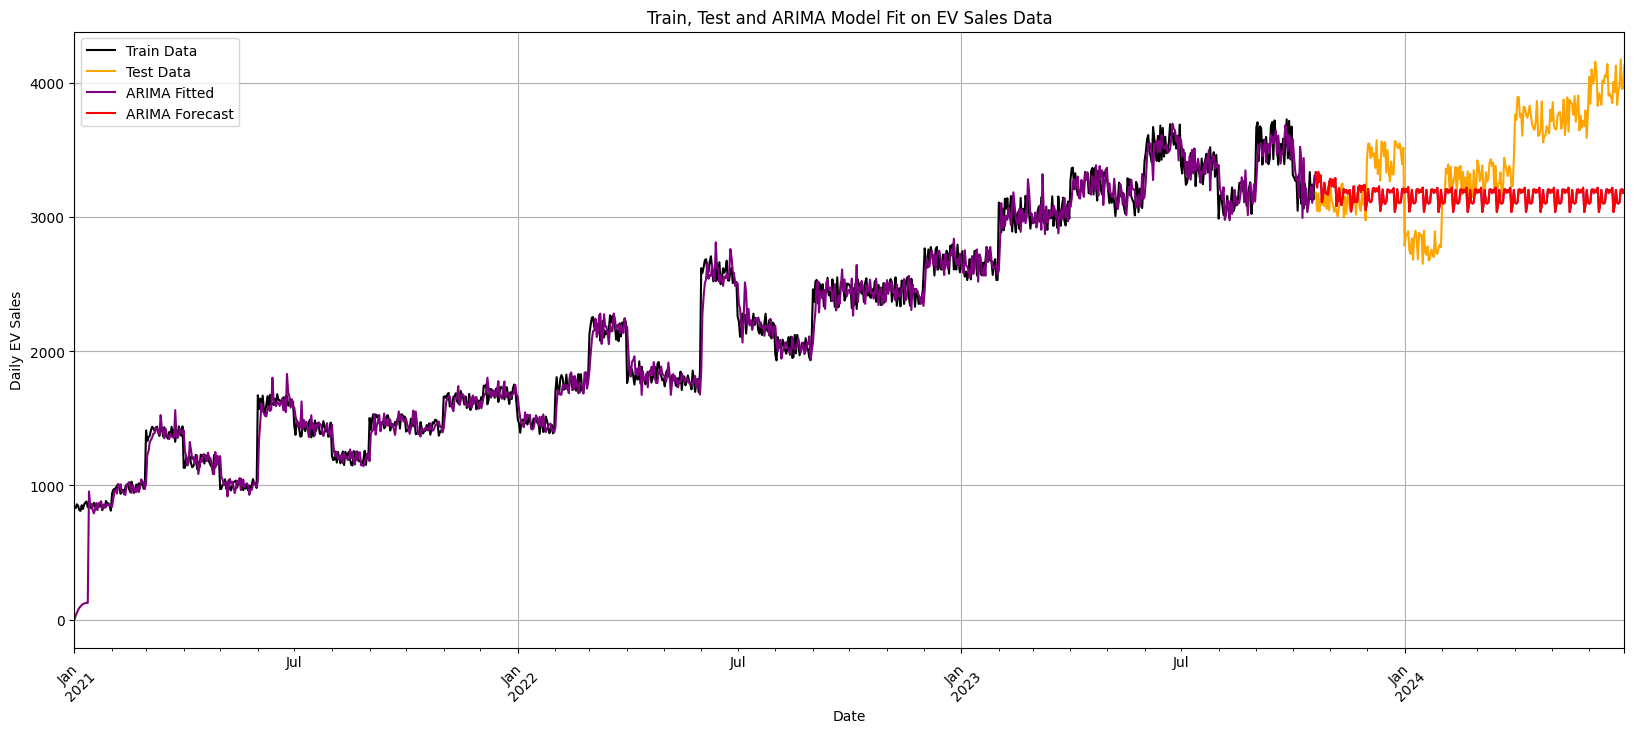

In [39]:
# Create a plot for the original data and ARIMA predictions
plt.figure(figsize=(20, 8))

# Plot the original train and test data
train_data['Daily EV Sales with Noise'].plot(color='black', label='Train Data')
test_data['Daily EV Sales with Noise'].plot(color='orange', label='Test Data')

# Plot the fitted values from the ARIMA model for the entire data range
fitted_values_full.plot(color='purple', label='ARIMA Fitted')

# Plot the forecasted values for the test data period
test_data.index[:len(arima_forecast)]  # Match the index with the test data
plt.plot(test_data.index, arima_forecast, color='red', label='ARIMA Forecast')

# Add labels and title
plt.title('Train, Test and ARIMA Model Fit on EV Sales Data')
plt.xlabel('Date')
plt.ylabel('Daily EV Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

#### Evaluation

 Accuracy metrics: \
 RMSE (Root Mean Squared Error) \
 MAE (Mean Absolute Error) \
 MAPE (Mean Absolute Percentage Error) \
 Cumulative Forecast Error (CFE) \
 R-squared (R^2)

I chose CFE and R² as additional metrics. CFE helps detect any long-term bias in the model, indicating whether it consistently over or under estimates stock prices. This is important for financial forecasting, where small biases can compound over time. R² measures the overall fit of the model to the data, reflecting how well the model explains the variance in stock prices. By combining these with RMSE and MAE, we get a fuller picture of both accuracy and model bias.

In [ ]:
#### Backtesting

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from math import sqrt
import pandas as pd

# Define the metrics dataframe which will be used for storing results
metrics_dataframe = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE', 'CFE', 'R-squared'])

def metrics_cal(actuals, predictions, model):
    mse = mean_squared_error(actuals, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100

    # Additional metrics
    cfe = np.sum(actuals - predictions)  # Cumulative Forecast Error (CFE)
    r_squared = r2_score(actuals, predictions)  # R-squared (R^2)

    # Store all metrics in the DataFrame
    df = pd.DataFrame({'Model': [model],
                       'RMSE': [rmse],
                       'MAE': [mae],
                       'MAPE': [mape],
                       'CFE': [cfe],
                       'R-squared': [r_squared]})

    global metrics_dataframe
    metrics_dataframe = pd.concat([metrics_dataframe, df], ignore_index=True)
    return metrics_dataframe

In [46]:
#get all the metrics

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                ins_cast3.values.flatten(),
                                'Simple 1')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                double_ets_add_pred.values.flatten(),
                                'Double Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                double_ets_mul_pred.values.flatten(),
                                'Double Mul')


metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                triple_ets_add_pred.values.flatten(),
                                'Triple Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                triple_ets_mul_pred.values.flatten(),
                                'Triple Mul')
metrics_dataframe = metrics_cal(test_data.values.flatten(),
                                arima_forecast,
                                'ARIMA')

<ipython-input-45-255db0dc24bd>:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, df], ignore_index=True)


In [47]:
metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE,CFE,R-squared
3,Triple Add,296.763017,227.924268,7.228402,-32527.017562,0.369002
1,Double Add,298.547365,233.352519,7.348065,-27995.198290,0.361391
4,Triple Mul,340.958203,262.275382,8.370736,-60253.472579,0.167065
0,Simple 1,406.614455,330.281441,9.445219,40931.702755,-0.184607
5,ARIMA,454.518392,368.581272,10.372015,62584.707263,-0.480170
2,Double Mul,1228.645258,1093.098910,31.781266,-278740.221929,-9.815875
